In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [3]:
cust_an = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
cust_an

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
cust_an.drop(columns='effective_to_date', inplace=True)

In [5]:
numericalx = cust_an.select_dtypes(np.number)
categoricalx = cust_an.select_dtypes(object)

####  X-y split (y is the target variable, which is the total claim amount)


In [6]:
x = numericalx.drop('total_claim_amount', axis=1)
y = numericalx.total_claim_amount

In [7]:
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [8]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

#### Train-test split.


In [9]:
x.isna().any()

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
dtype: bool

In [10]:
# test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TT_RATIO, random_state=RAND_STATE)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000
mean,8025.418872,51950.402165,93.312216,15.098637,47.857124,0.371558,2.987437
std,6990.063435,24807.850658,34.164711,10.083326,27.966835,0.890703,2.415773
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3979.250000,29479.500000,69.000000,6.000000,24.000000,0.000000,1.000000
50%,5799.000000,50603.000000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,8936.750000,72332.500000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


#### Standardize the data (after the data split).


In [11]:
y_train

2705     236
2209     511
4004     478
1898     768
10016    450
        ... 
5667     712
324      806
3157      35
5993     422
5242     552
Name: total_claim_amount, Length: 7482, dtype: int64

In [12]:
y_test

5613    542
9585     60
2042    303
7819    552
8261    345
       ... 
8764    209
7120    355
6782     60
1687     93
11      199
Name: total_claim_amount, Length: 3207, dtype: int64

In [13]:
sts = StandardScaler()

In [14]:
x_train_standarized = sts.fit_transform(x_train)
x_test_standarized = sts.transform(x_test)

In [15]:
x_train_standarized = pd.DataFrame(x_train_standarized)

In [16]:
x_train_standarized.describe()

,0,1,2,3,4,5,6
count,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03
mean,-1.221494e-17,-3.024104e-17,-8.066997e-16,1.619261e-17,-7.799161e-17,-2.546153e-16,1.649086e-16
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-8.766485e-01,-1.689635e+00,-9.458407e-01,-1.497487e+00,-1.711324e+00,-4.171796e-01,-8.227467e-01
25%,-5.788845e-01,-9.058586e-01,-7.116653e-01,-9.024051e-01,-8.531076e-01,-4.171796e-01,-8.227467e-01
50%,-3.185333e-01,-5.431717e-02,-3.018584e-01,-1.089631e-01,5.109115e-03,-4.171796e-01,-4.087728e-01
75%,1.303839e-01,8.216536e-01,4.592116e-01,7.836592e-01,8.275668e-01,-4.171796e-01,4.191748e-01
max,1.077309e+01,1.936234e+00,5.991605e+00,1.973822e+00,1.828820e+00,5.196738e+00,2.489044e+00


In [17]:
x_train_standarized.mean()

0   -1.221494e-17
1   -3.024104e-17
2   -8.066997e-16
3    1.619261e-17
4   -7.799161e-17
5   -2.546153e-16
6    1.649086e-16
dtype: float64

In [18]:
x_train_standarized.std()

0    1.000067
1    1.000067
2    1.000067
3    1.000067
4    1.000067
5    1.000067
6    1.000067
dtype: float64

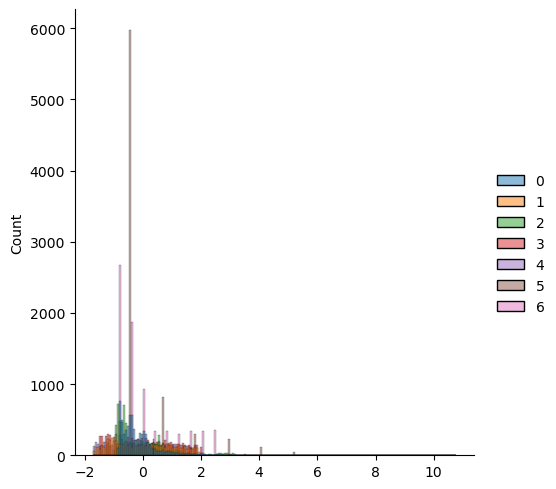

In [19]:
sns.displot(x_train_standarized)

#### Apply linear regression.


In [20]:
x_train_const = sm.add_constant(x_train_standarized.to_numpy()) # adding a constant

model = sm.OLS(y_train, x_train_const).fit()
predictions_train = model.predict(x_train_const)

x_test_const = sm.add_constant(x_test_standarized) # adding a constant
predictions_test = model.predict(x_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     753.9
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:59:01   Log-Likelihood:                -51074.
No. Observations:                7482   AIC:                         1.022e+05
Df Residuals:                    7474   BIC:                         1.022e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.580    168.931      0.0

#### Model Interpretation.


In [21]:
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     753.9
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:59:01   Log-Likelihood:                -51074.
No. Observations:                7482   AIC:                         1.022e+05
Df Residuals:                    7474   BIC:                         1.022e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.580    168.931      0.000     430.772     440.887
x1            -5.9960      2.834     -2.116      0.034     -11.551      -0.441
x2           -31.7044      2.581    -12.282      0.000     -36.764     -26.644
x3           187.0984      2.833     66.046      0.000     181.545     192.652
x4             2.0556      2.583      0.796      0.426      -3.007       7.119
x5            -0.6477      2.583     -0.251      0.802      -5.711       4.415
x6            -0.5958      2.582     -0.231      0.817      -5.656       4.465
x7            -0.1549      2.581     -0.060      0.952      -5.215       4.905
==============================================================================
Omnibus:                      798.517   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3714.401
Skew:                           0.427   Prob(JB):                         0.00
Kurtosis:                       6.344   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
model.coef_
model.intercept_
###

-3.4644757684596925

#### Model Validation


#### Model Evaluation: 
- MSE.

In [23]:
y_pred = pd.DataFrame(model.predict(x_test),columns = ['total_claim_amount'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(x_train),columns = ['total_claim_amount'])

In [24]:
mse(y_test,y_pred)

52330.37932325502

- RMSE

In [25]:
rmse = np.sqrt(mse(y_test,y_pred))
rmse

228.75834263094106

In [26]:
##prediction on the train set
mse(y_train,y_pred_train)

49747.15936894188

- MAE

In [27]:
mae(y_test,y_pred)

153.8918560923347

- R2

In [28]:
R2=r2_score(y_test,y_pred)
R2

0.39992389876814183

- Adjusted R2

In [29]:
R2_test=model.score(x_test,y_test)
R2_train=model.score(x_train,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2

0.3986108219601946

#### Feature Importance

In [30]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_.reshape(len(x_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,5.476729
5,number_of_open_complaints,0.668978
3,months_since_last_claim,0.203879
6,number_of_policies,0.064126
4,months_since_policy_inception,0.023162
1,income,0.001278
0,customer_lifetime_value,0.000858


#### Model Iteration

### - Please rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).


- #### x-y split

In [31]:
x2 = cust_an.drop('total_claim_amount', axis=1)
y2 = cust_an.total_claim_amount

In [32]:
numericalx2 = x2.select_dtypes(np.number)
categoricalx2 = x2.select_dtypes(object)

In [33]:
numericalx2.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [34]:
categoricalx2.columns

Index(['region', 'response', 'coverage', 'education', 'month',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [35]:
# one-hot encode the categorical features
x2 = pd.concat([pd.get_dummies(x2[categoricalx2.columns],drop_first=True), numericalx2], axis=1)

In [36]:
x2.columns

Index(['region_east', 'region_north west', 'region_west region',
       'response_yes', 'coverage_extended', 'coverage_premium',
       'education_college', 'education_doctor',
       'education_high school or below', 'education_master', 'month_jan',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single',
       'policy_type_personal auto', 'policy_type_special auto',
       'policy_corporate l2', 'policy_corporate l3', 'policy_personal l1',
       'policy_personal l2', 'policy_personal l3', 'policy_special l1',
       'policy_special l2', 'policy_special l3', 'renew_offer_type_offer2',
       'renew_offer_type_offer3', 'renew_offer_type_offer4',
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury car',
       'vehicle_cla

- Train-test split.

In [37]:
# test-train split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=TT_RATIO, random_state=RAND_STATE)
x2_train = pd.DataFrame(x2_train)
x2_test = pd.DataFrame(x2_test)
y2_train = pd.DataFrame(y2_train)
y2_test = pd.DataFrame(y2_test)

In [38]:
x2_train.isna().sum()

region_east                        0
region_north west                  0
region_west region                 0
response_yes                       0
coverage_extended                  0
coverage_premium                   0
education_college                  0
education_doctor                   0
education_high school or below     0
education_master                   0
month_jan                          0
employment_status_employed         0
employment_status_medical leave    0
employment_status_retired          0
employment_status_unemployed       0
gender_m                           0
location_code_suburban             0
location_code_urban                0
marital_status_married             0
marital_status_single              0
policy_type_personal auto          0
policy_type_special auto           0
policy_corporate l2                0
policy_corporate l3                0
policy_personal l1                 0
policy_personal l2                 0
policy_personal l3                 0
p

In [39]:
x2_test.isna().sum()

region_east                        0
region_north west                  0
region_west region                 0
response_yes                       0
coverage_extended                  0
coverage_premium                   0
education_college                  0
education_doctor                   0
education_high school or below     0
education_master                   0
month_jan                          0
employment_status_employed         0
employment_status_medical leave    0
employment_status_retired          0
employment_status_unemployed       0
gender_m                           0
location_code_suburban             0
location_code_urban                0
marital_status_married             0
marital_status_single              0
policy_type_personal auto          0
policy_type_special auto           0
policy_corporate l2                0
policy_corporate l3                0
policy_personal l1                 0
policy_personal l2                 0
policy_personal l3                 0
p

- Standardize the data (after the data split).

In [40]:
type(x2_train)

pandas.core.frame.DataFrame

In [44]:
sts.fit(x2_train[numericalx2.columns])
x2_train[numericalx2.columns]=sts.transform(x2_train[numericalx2.columns])
x2_test[numericalx2.columns] = sts.transform(x2_test[numericalx2.columns])

In [43]:
x2_train

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2705,0,0,0,0,0,0,1,0,0,0,...,0,1,0,-0.463463,-0.259427,-0.945841,-0.505684,-0.531276,-0.417180,2.489044
2209,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2.063006,1.144456,-0.653122,1.676281,-0.459758,-0.417180,-0.408773
4004,0,0,1,0,1,0,0,0,0,0,...,0,1,0,-0.230831,0.275157,-0.301858,0.486118,0.076627,1.828387,0.419175
1898,1,0,0,0,0,0,0,0,0,0,...,0,1,0,-0.825716,-0.119825,-0.828753,-0.803225,1.685783,-0.417180,-0.822747
10016,0,0,1,0,1,0,0,0,0,0,...,1,1,0,-0.085616,-0.931316,0.078677,0.684479,0.219663,-0.417180,1.661096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,0,1,0,0,1,0,0,0,0,0,...,0,0,1,-0.196781,-0.309858,0.166492,0.089397,0.613013,1.828387,0.005201
324,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0.443313,-0.199805,0.547027,0.982020,0.756049,-0.417180,-0.408773
3157,0,0,1,0,0,0,0,0,1,0,...,0,1,0,-0.773781,1.870001,-0.828753,-0.208143,-0.531276,-0.417180,-0.822747
5993,0,0,0,0,1,0,0,0,0,0,...,0,1,0,-0.663618,-1.160775,-0.155499,-0.604864,-1.496770,1.828387,-0.822747


In [45]:
x2_train.std()

region_east                        0.286128
region_north west                  0.451230
region_west region                 0.475037
response_yes                       0.334455
coverage_extended                  0.459583
coverage_premium                   0.285553
education_college                  0.457017
education_doctor                   0.182478
education_high school or below     0.452622
education_master                   0.270365
month_jan                          0.498529
employment_status_employed         0.484302
employment_status_medical leave    0.206821
employment_status_retired          0.169319
employment_status_unemployed       0.436197
gender_m                           0.499872
location_code_suburban             0.482353
location_code_urban                0.378459
marital_status_married             0.494008
marital_status_single              0.445491
policy_type_personal auto          0.436047
policy_type_special auto           0.198994
policy_corporate l2             

- Apply linear regression.

In [46]:
x2_train.shape

(7482, 50)

In [47]:
x2_test.shape

(3207, 50)

In [48]:
x2_train.shape

(7482, 50)

In [50]:
x2_train_const = sm.add_constant(x2_train.to_numpy()) # adding a constant

model2 = sm.OLS(y2_train, x2_train_const).fit()
predictions_train2 = model2.predict(x2_train_const)

x2_test_const = sm.add_constant(x2_test) # adding a constant
predictions_test2 = model2.predict(x2_test_const)
print_model2 = model2.summary()
print_model2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     531.3
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:00:22   Log-Likelihood:                -47504.
No. Observations:                7482   AIC:                         9.511e+04
Df Residuals:                    7433   BIC:                         9.544e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.6868     14.651      9.398      0.000     108.967     166.406
x1             3.6957      6.167      0.599      0.549      -8.394      15.785
x2            -0.4671      4.275     -0.109      0.913      -8.848       7.914
x3             3.6028      4.096      0.880      0.379      -4.426      11.631
x4           -24.0500      5.212     -4.615      0.000     -34.266     -13.834
x5           -14.7715      4.563     -3.237      0.001     -23.717      -5.826
x6           -23.3256      8.745     -2.667      0.008     -40.467      -6.184
x7            -9.9885      4.174     -2.393      0.017     -18.171      -1.806
x8           -20.6029      9.189     -2.242      0.025     -38.616      -2.590
x9             6.2354      4.237      1.471      0.141      -2.071      14.542
x10          -16.9603      6.471     -2.621      0.009     -29.646      -4.275
x11           -2.5583      3.232     -0.792      0.429      -8.893       3.776
x12           -5.8126      8.353     -0.696      0.487     -22.187      10.561
x13           19.6140     10.724      1.829      0.067      -1.408      40.636
x14           -4.8050     12.310     -0.390      0.696     -28.937      19.327
x15           85.2153      8.861      9.617      0.000      67.846     102.585
x16           17.6313      3.249      5.427      0.000      11.263      24.000
x17          377.7868      4.668     80.934      0.000     368.637     386.937
x18          219.7086      5.318     41.313      0.000     209.283     230.134
x19           -4.1994      4.768     -0.881      0.378     -13.546       5.147
x20           62.1496      5.471     11.359      0.000      51.424      72.875
x21        -3.121e+13   1.01e+14     -0.310      0.756   -2.28e+14    1.66e+14
x22        -4.676e+11   1.51e+12     -0.310      0.756   -3.42e+12    2.49e+12
x23          -12.5975     10.342     -1.218      0.223     -32.870       7.675
x24           -2.0982      9.499     -0.221      0.825     -20.720      16.523
x25         3.121e+13   1.01e+14      0.310      0.756   -1.66e+14    2.28e+14
x26         3.121e+13   1.01e+14      0.310      0.756   -1.66e+14    2.28e+14
x27         3.121e+13   1.01e+14      0.310      0.756   -1.66e+14    2.28e+14
x28         4.676e+11   1.51e+12      0.310      0.756   -2.49e+12    3.42e+12
x29         4.676e+11   1.51e+12      0.310      0.756   -2.49e+12    3.42e+12
x30         4.676e+11   1.51e+12      0.310      0.756   -2.49e+12    3.42e+12
x31           16.6510      4.059      4.102      0.000       8.694      24.608
x32            7.9543      4.817      1.651      0.099      -1.488      17.397
x33            7.7552      5.676      1.366      0.172      -3.372      18.883
x34           -1.5452      4.038     -0.383      0.702      -9.461       6.371
x35           -0.9675      4.568     -0.212      0.832      -9.922       7.987
x3

In [48]:
model2 = lm.fit(x2_train,y2_train)
model2.coef_

array([[ 5.39010337e+00,  2.35402619e+00,  5.57549463e+00,
        -1.24230194e+01,  9.45246094e+01,  2.32464617e+02,
        -7.89588321e+00, -1.75168842e+01,  6.69189021e+00,
        -8.28421668e+00, -3.42428520e+00, -1.38971242e+01,
         1.93677651e+01, -1.91934182e+01,  7.01226609e+01,
         1.78380568e+01,  3.82911537e+02,  2.18917467e+02,
        -2.83929962e+00,  6.15910937e+01,  2.63386266e+15,
         5.05572351e+15, -1.74912367e+01, -7.56249452e+00,
        -2.63386266e+15, -2.63386266e+15, -2.63386266e+15,
        -5.05572351e+15, -5.05572351e+15, -5.05572351e+15,
         1.27246329e+01,  1.91058412e+00,  7.36381186e+00,
        -3.01520808e+00, -7.74058542e-01, -4.50094414e+00,
         6.69985919e+02,  6.24153585e+02,  1.93668431e+02,
         1.94058667e+02, -4.71750026e+00, -3.27525230e+00,
         3.03740107e-01]])

In [49]:
model2.intercept_

array([10.07945736])

In [50]:
y2_pred = pd.DataFrame(model2.predict(x2_test),columns = ['total_claim_amount'] )      # model prediction
y2_pred_train =  pd.DataFrame(model2.predict(x2_train),columns = ['total_claim_amount'])

- Model Interpretation.

C:\Users\migue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

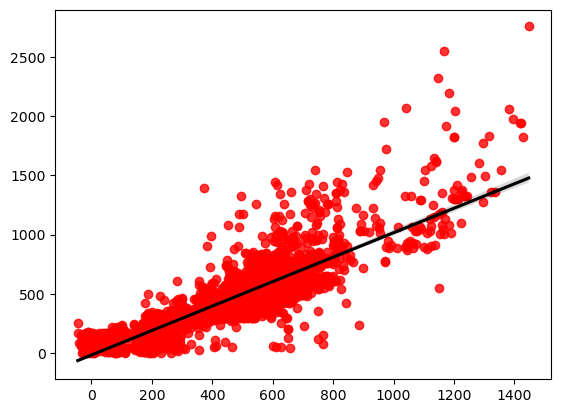

In [51]:
yp_ = y2_pred.to_numpy()
yt_ = y2_test.to_numpy()
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Model Evaluation:
- MSE.

In [52]:
mse(y2_test,y2_pred)

24189.02571519123

- RMSE.

In [53]:
rmse2 = np.sqrt(mse(y2_test,y2_pred))
rmse2

155.52821517393951

- MAE.

In [54]:
mae(y2_test,y2_pred)

103.67156366259589

- R2

In [55]:
R2_2=r2_score(y2_test,y2_pred)
R2_2

0.7226227588738555

- R2 adjusted

In [56]:
R2_test2=model2.score(x2_test,y2_test)
R2_train2=model2.score(x2_train,y2_train)
Adj2_R2= 1 - (1-R2_2)*(len(y2_test)-1)/(len(y2_test)-x2_test.shape[1]-1)
Adj2_R2

0.7188519016596842

#### Feature Importance

In [57]:
features_importances2 = pd.DataFrame(data={
    'Attribute': x2_train.columns,
    'Importance': abs(model2.coef_.reshape(len(x2_train.columns),))
})
features_importances2 = features_importances.sort_values(by='Importance', ascending=False)
features_importances2

,Attribute,Importance
2,monthly_premium_auto,5.476729
5,number_of_open_complaints,0.668978
3,months_since_last_claim,0.203879
6,number_of_policies,0.064126
4,months_since_policy_inception,0.023162
1,income,0.001278
0,customer_lifetime_value,0.000858


(Optional) Please rerun the model after removing the outliers and compare the results using R2 metric.

In [58]:
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df